# Feature Engineering

Feature Engineering (or Data Wrangling) is the process of converting data from the initial format to a format better suited for analysis. It includes various techniques such as dealing with missing values, converting columns, and so on. 

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. I think feature engineering efforts mainly have two goals:
* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

# Importing data and libraries

The first step is to importing the libraries and the data. The data used is the Automobile Data Set available at UCI Machine Learning Repository by Jeffrey C. Schlimmer. Here's the [link](https://archive.ics.uci.edu/ml/datasets/automobile).

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data and setting headers

The dataset in here was taken from IBM Cloud. You can use the link above to download it too. 

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

If you take a close look at the data by opening it, you might realize that it's missing headers. So, we would need to add them manually. First, we create a python list containing the name of the headers.

In [3]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]

Next, we use the Pandas method `read_csv()` to load the data from the web address. For setting headers, we et the parameter `names` as `headers` list.

In [4]:
df = pd.read_csv(filepath, names=headers)

To check if we get it right, we use the method `head()` to display the first five rows of the dataframe.

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Imputation

As we can see above, there are several question marks in the dataframe. Those are missing values which may hinder our further analysis. Since they have ? mark, it's also likely not be a string. This would throw our calculations and everything off later on. We would need to correct it.

For missing and ill-represented data, there are various ways to deal with it; we will discuss some of them here. 

Broadly, the steps taken are:
* Identifing missing data
* Dealing with missing data
* Correcting the data format

## Missing Data: Identifying the missing values

Identifying the missing values is instrumental to dealing with them. First, it's useful to convert them into NAN values so that we can use some pandas built-in functions methods to speed up the process. 

### Converting "?" to NaN

In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker

For that, we use the `.replace()` method. Notice the use of `inplace` parameter. This would modify the data inplace rather than creating a copy of it (which is what we want in this case).

In [6]:
df.replace("?", np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Analyzing for the Missing Data

Now that we have converted the missing values to default, we can use `.isna()` and `.notna()` methods to identify the missing data. 

These methods return a dataframe containing boolean values with the result of that cell. For `isna()` it will be true for NA (or NAN) values and vice-versa for `notna`

In our example, we can do something like this:

In [7]:
missing_dataframe = df.isna()
missing_dataframe.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This also matches with our expectations from above. The first 3 cells of the normalized-losses column are True whereas the rest are False.

### Count missing values in each column

The next step is to count the missing values to make an informed decision to what to do with it. The counts is important when you're deciding whether to drop the data or fill it with values (and what values to fill it with). 

To do that, we use `appy()` method and supply `pandas.value_counts()` method. This would return to us the value counts for the column, or number of Trues and Falses. Since there might be columns with no NA values, we use the `fillna()` method and pass in 0 for readability. Finally, we use the `transpose()` method to make the column names as rows and results as coulumns.

In [8]:
missing_dataframe.apply(pd.value_counts).fillna(0).transpose()

,False,True
symboling,205.0,0.0
normalized-losses,164.0,41.0
make,205.0,0.0
fuel-type,205.0,0.0
aspiration,205.0,0.0
num-of-doors,203.0,2.0
body-style,205.0,0.0
drive-wheels,205.0,0.0
engine-location,205.0,0.0
wheel-base,205.0,0.0


Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


## Dealing with the missing values

There are various strategies to deal with the missing values. Your first action should be try and see if you can fill it with real data. This could mean some overhead but will lead to a better analysis. 

If you can't then common ways to forward are:

* Drop Data
    - Drop the whole row
    - Drop the whole column

Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values. I suggest **beginning with considering a possible default value** of missing values in the column. For example, if you have a column that only has 1 and NA, then it is likely that the NA rows correspond to 0. For another example, if you have a column that shows the “customer visit count in last month”, the missing values might be replaced with 0 as long as you think it is a sensible solution.

* Replace Data
    - **Numerical Imputation:** In this, we replace it with a metric such as mean or median.
    - **Categorical Imputation:** Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. 
    - **Random sample imputation:** This consists of taking random observation from the dataset and we use this observation to replace the NaN values
    - Replace it based on **other functions**

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.

We can apply the rest of the methods in the dataset pretty easily. However, some methods may seem more reasonable than others. Here's what we will do:

__Numerical Imputation:__

Usually a great choice for continous variables with a decent interval size. We will apply it on:

* normalized-losses
* stroke
* bore
* horsepower
* peak-rpm


__Categorical Imputation:__

Great choice when the variable is categorical in nature and a value is likely to occur far more than others. We will use it on

* num-of-doors: Replace it with "four" since 84% sedans are four doored.

__Drop the whole row:__

When the data missing is critical, it's often prudent to drop the whole row. 

* "price": In this example, we are going to use the data to predict the price. So, removing rows makes sense because without price the data entry is useless

### Numerical Imputation

To replace by mean, we first (unsurprisingly) find the mean. Before that, however, we would need to convert the columns to numeric or 'float' so that the function can work properly. We do that by using `astype()` method. Then we call the pandas' native `mean()` method. 

Let's find the average of the 'horsepower' column. 

In [9]:
avg_hp = df["horsepower"].astype("float").mean()
print("Average horsepower:", avg_hp)

Average horsepower: 104.25615763546799


The next step, naturally, is to substitute the NA values with mean. We do that by using the `replace()` method.

In [10]:
df["horsepower"].replace(np.nan, avg_hp, inplace=True)

You can continue to do the same process with the rest of the variables.

### Categorical Imputation

When replacing by frequency, we should first verify whether it would make sense. We should do it only when a value is very likely to appear instead of the NA value. Again, we use the `value_counts()` method for this.

In [11]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. To replace, we follow the same procedure.

In [12]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [13]:
pd.__version__

'1.2.3'

### Dropping Rows

Finally, let's drop all rows that do not have price data. We use the `dropna()` method and pass in `['price']` as the `subset` parameter so that it only removes the rows with price as NA.

Next, we use the `reset_index()` method to reset the index since it doesn't do it by default.

In [14]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [15]:
# Let's see how it looks like
df.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


Looking good. Now we need to move into correcting the data format. After all, having strings instead of number would throw the calculations off.

# Correcting data format

An important step is checking and making sure that all data is in the correct format (int, float, text or other).

If that's not the case, it is liable to throw the algorithm astray because the assumptions are not going to be met.

In Pandas, we use 

`dtype()` to check the data type and `astype()` to change the data type. 

Let's first see the data types for each column.

In [16]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

It's apparent that some columns are not of the correct data type. 

Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. 

For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'.

We have to convert data types into a proper format for each column using the `astype()` method.

In [17]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Let us check the columns after the conversion

In [18]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Handling Outliers

Outliers can be problematic in various ways. Although some algorithms are not sensitive to them, some are. Here's a non-exhaustive list:

* SVM - No
* Linear Regression - Yes
* Logistic Regression - Yes
* Decision Trees - No
* Ensemble (RF, XGBoost, GB) - No
* kNN - No
* K-means - Yes
* Hierarchical - Yes
* PCA - Yes

Before mentioning how outliers can be handled, I want to state that the **best way to detect the outliers is to demonstrate the data visually.** All other statistical methodologies are open to making mistakes, whereas visualizing the outliers gives a chance to take a decision with high precision. Some good visualisation methods there would be boxplot, histograms, and scatterplot. Which ones should you remove or not will depend on the domain knowledge.

Statistical methodologies are less precise as I mentioned, but on the other hand, they have a superiority, they are fast. Here I will list two different ways of handling outliers. These will detect them using standard deviation, and percentiles.

## Outlier Detection with Standard Deviation

If a value has a distance to the average higher than **x * standard deviation**, it can be assumed as an outlier. Then what x should be?

There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

```python
 # Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['column'].mean () + data['column'].std () * factor
lower_lim = data['column'].mean () - data['column'].std () * factor

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

In addition, z-score can be used instead of the formula above. Z-score (or standard score) standardizes the distance between a value and the mean using the standard deviation.

## Outlier Detection with Percentiles

Another mathematical method to detect outliers is to use percentiles. You can assume a certain percent of the value from the top or the bottom as an outlier. The key point is here to set the percentage value once again, and this depends on the distribution of your data as mentioned earlier.
Additionally, a common mistake is using the percentiles according to the range of the data. In other words, if your data ranges from 0 to 100, your top 5% is not the values between 96 and 100. Top 5% means here the values that are out of the 95th percentile of data.
```python
 # Dropping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

## An Outlier Dilemma: Drop or Cap

Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.
On the other hand, capping can affect the distribution of the data, thus it better not to exaggerate it.
```python
 # Capping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)
data.loc[(df[column] > upper_lim),column] = upper_lim
data.loc[(df[column] < lower_lim),column] = lower_lim
```

# Standardizing the Data Units

Data is usually collected from different agencies with different formats. This is often inconvenient at best and problem causing at worst since performing calculations on different units results in wildly different results. We need to transform the data into a common format to make the meaningful comparisons and correct models.

__Example__

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard. So, we need to perform conversions on it.

The formula for unit conversion is

$L/100km = 235 / mpg$

Fortunately, we can do many mathematical operations directly in Pandas.

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [20]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


# Scaling

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?

Scaling solves this problem. The **continuous features become identical in terms of the range, after a scaling process.** This process is not mandatory for many algorithms, but it might be still nice to apply. However, you **must apply it for some algorithms.** The algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

## Normalization

Normalization is the process of transforming values of several variables into a similar range. There are various normalizatons techniques. 

Common normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from *0 to 1.*

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" and our goal is to normalize the data in range of \[0, 1\]. 

The formula would be:

$i = (i - min)/(max - min)$

Here's how to do it in code:

In [21]:
# Get the maximum and minimum values
length_min = df['length'].min()
width_min = df['width'].min()
height_min = df['height'].min()
length_max = df['length'].max()
width_max = df['width'].max()
height_max = df['height'].max()

# Perform the transformation
df['length'] = (df['length'] - length_min)/(length_max - length_min)
df['width'] = (df['width'] - width_min)/(width_max - width_min)
df['height'] = (df['height'] - height_min)/(height_max - height_min)

Let's see how does it look like.

In [22]:
df.head(10)[['length', 'width', 'height']]

,length,width,height
0,0.413433,0.324786,0.083333
1,0.413433,0.324786,0.083333
2,0.449254,0.444444,0.383333
3,0.529851,0.504274,0.541667
4,0.529851,0.521368,0.541667
5,0.540299,0.512821,0.441667
6,0.770149,0.948718,0.658333
7,0.770149,0.948718,0.658333
8,0.770149,0.948718,0.675000
9,0.532836,0.384615,0.541667


## Standardization

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean and s is the standard deviation.

There are many ways to do it. You can do it manually:

```python
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
```

Or with `sklearn`:

```python
>>> from sklearn.preprocessing import StandardScaler
>>> data = [[0, 0], [0, 0], [1, 1], [1, 1]]
>>> scaler = StandardScaler()
>>> print(scaler.fit(data))
StandardScaler()
>>> print(scaler.mean_)
[0.5 0.5]
>>> print(scaler.transform(data))
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
>>> print(scaler.transform([[2, 2]]))
[[3. 3.]]
```

# Feature Splitting

Splitting features is a good way to make them useful in terms of machine learning. Most of the time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features:
* We enable machine learning algorithms to comprehend them.
* Make possible to bin and group them.
* Improve model performance by uncovering potential information.

Split function is a good option, however, there is no one way of splitting features. It depends on the characteristics of the column, how to split it. Let’s introduce it with two examples. First, a simple split function for an ordinary name column:
```python
data.name
0  Luther N. Gonzalez
1    Charles M. Young
2        Terry Lawson
3       Kristen White
4      Thomas Logsdon

#Extracting first names
data.name.str.split(" ").map(lambda x: x[0])
0     Luther
1    Charles
2      Terry
3    Kristen
4     Thomas

#Extracting last names
data.name.str.split(" ").map(lambda x: x[-1])
0    Gonzalez
1       Young
2      Lawson
3       White
4     Logsdon
```

The example above handles the names longer than two words by taking only the first and last elements and it makes the function robust for corner cases, which should be regarded when manipulating strings like that.

Another case for split function is to extract a string part between two chars. The following example shows an implementation of this case by using two split functions in a row.
```python
#String extraction example
data.title.head()
0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
data.title.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]
0    1995
1    1995
2    1995
3    1995
4    1995
```

# Binning

Binning is a process of converting data into small bins. Binning can be applied on both categorical and numerical data.

**Numerical Binning Example**

*Value  ->    Bin*       
0-30   ->  Low       
31-70  ->  Mid       
71-100 ->  High

**Categorical Binning Example**

*Value   ->   Bin*       
Spain  ->  Europe      
Italy  ->  Europe       
Chile  ->  South America
Brazil ->  South America

The main motivation of binning is to make the model more **robust and prevent overfitting,** however, it has a **cost to the performance.** Every time you bin something, you sacrifice information and make your data more regularized.

The trade-off between performance and overfitting is the key point of the binning process. In my opinion, for numerical columns, except for some obvious overfitting cases, binning might be redundant for some kind of algorithms, due to its effect on model performance.

However, for categorical columns, the labels with low frequencies probably affect the robustness of statistical models negatively. Thus, assigning a general category to these less frequent values helps to keep the robustness of the model. For example, if your data size is 100,000 rows, it might be a good option to unite the labels with a count less than 100 to a new category like “Other”.

Let's see an example. In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)?

To achieve that, we would be using the method `cut()`

It's recommended to first make a histogram plot to see what does the distribution looks like. We will use the seaborn library.

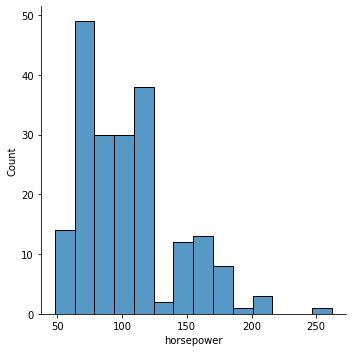

In [23]:
df['horsepower'] = df['horsepower'].astype('float64')  # Need this data type
sns.displot(data=df, x='horsepower');

Let's say we want to split them equally. For that, we will build a bin array whose values will be used to determine when one bin ends and another begins.

We can do that by using numpy's `linspace()` function.

Here's what we would want in the parameters:
* Since we want to include the minimum value of horsepower, so `start_value = min(df["horsepower"])`
* Since we want to include the maximum value of horsepower, so `end_value = max(df["horsepower"])`
* Since we are building 3 bins of equal length, there should be 4 dividers, so `numbers_generated = 4`

In [24]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 We set group  names:


In [25]:
group_names = ['Low', 'Medium', 'High']

We apply the function `cut()` to the determine where each value of `df['horsepower']` belongs to

In [26]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,
                                 include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


Lets see the number of vehicles in each bin.


In [27]:
horsepower_bin_val = df["horsepower-binned"].value_counts()
horsepower_bin_val

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

## Visualizing Bins

After the binning, it's a good idea to plot the distribution of each bin in a bargraph. We can use the `barplot()` in seaborn to achieve this.

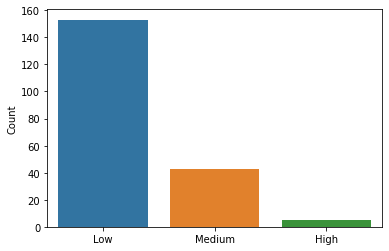

In [28]:
sns.barplot(x=horsepower_bin_val.index, y=horsepower_bin_val)
plt.ylabel("Count");

# Log Transformation

Log transformation is a data transformation method in which it replaces each variable x with a log(x).

When our original continuous data is **right skewed**, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. 

Log-scale can transform exponential changes to additive. For example if a change in y is brought by doubling of x, log(x) would make it linear instead.

## Important things to consider

* Applying it on already left skewed or uniform would **make it more skewed.** 
* If originally the **relationships were linear, they would not longer be.** And if they were already curved, doing this automatically might make them worse (more curved), not better.

<img src="https://i.stack.imgur.com/KIHPR.png"/>

This [Cross Validated](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va) forum has excellent info on when to apply log transformation

# Grouping 

In most machine learning algorithms, every instance is represented by a row in the training dataset, where every column show a different feature of the instance. This kind of data called “Tidy”.

Datasets such as transactions rarely fit the definition of tidy data above, because of the multiple rows of an instance. In such a case, we group the data by the instances and then every instance is represented by only one row.

The key point of group by operations is to decide the aggregation functions of the features. For numerical features, average and sum functions are usually convenient options, whereas for categorical features it becomes more complicated.

## Categorical Column Grouping

I suggest three different ways for aggregating categorical columns:

* The first option is to select the **label with the highest frequency.** In other words, this is the max operation for categorical columns, but ordinary max functions generally do not return this value, you need to use a lambda function for this purpose. Here's an example:

```python
data.groupby('id').agg(lambda x: x.value_counts().index[0])
```

* Second option is to make a **pivot table.** This approach resembles the encoding method in the preceding step with a difference. Instead of binary notation, it can be defined as aggregated functions for the values between grouped and encoded columns. This would be a good option if you aim to go beyond binary flag columns and merge multiple features into aggregated features, which are more informative. Here's an example:

```python
data.pivot_table(index='column_to_group', columns='column_to_encode', values='aggregation_column', aggfunc=np.sum, fill_value = 0)
```

* Last categorical grouping option is to **apply a group by function**, possibly after applying one-hot encoding. This method preserves all the data -in the first option you lose some-, and in addition, you transform the encoded column from categorical to numerical in the meantime. You can check the next section for the explanation of numerical column grouping.

## Numerical Column Grouping

Numerical columns are grouped using sum and mean functions in most of the cases. Both can be preferable according to the meaning of the feature. For example, if you want to obtain ratio columns, you can use the average of binary columns. In the same example, sum function can be used to obtain the total count either.
```python
#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = data.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)
```

# Encoding Categorical Variables 

Often we need to encode categorical variables. This is particularly needed when we need to regression analysis; regression doesn't understand words, only numbers. 

There are two main ways to do this:
* __Label Encoding:__ Encode labels to certain values. For eg. a - 1, b - 2, c -3 and so on. 
* __One-hot Encoding:__ Create columns with the labels and assign a binary true or false value. So, in the example above, we will create columns a, b, and c and assign 1 in 'a' where the label is 'a' and 0 every where and so on. 

We will encode drive-wheels using Label Encoding and fuel-type using One-hot encoding.

## Label Encoding

Label encoding, in simple terms, is simply substituting the labels with a number. It is particularly useful in ordinal variables such as happiness levels (very happy, somewhat happy, neutral and so on.)

**Important:** There is a problem here. Since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One Hot Encoder.

Now, we will demonstrate an example.

We can do that by converting the column to the category type and use the `.cat.codes` field. 

First, let's check the unique values.

In [29]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Looks like there are 3 values. Now let's do the encoding. 

In [30]:
encoded_drive_wheels = df['drive-wheels'].astype('category').cat.codes.to_frame()
encoded_drive_wheels

,0
0,2
1,2
2,2
3,1
4,0
...,...
196,2
197,2
198,2
199,2


Now we need to rename the columns and add it to the dataframe.

In [31]:
# Rename column
encoded_drive_wheels.rename(columns={0: "Encoded Drive Wheels"}, inplace=True)

# Add it to the dataframe
df = pd.concat([df, encoded_drive_wheels], axis='columns')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,Encoded Drive Wheels
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,2
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,2
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,2
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Low,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Low,2
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,Medium,2
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,2
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Low,2


There we go. It's done.

## One-hot Encoding

Depending on the data we have, we might run into situations where, after label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy, when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column. One hot encoding is a great technique since it only uses binary values to demonstrate the labels.

In it, each *unique* label becomes a column that has either 0 or 1 depending upon whether the row had that particular label or not.

However, it can quickly lead to an expansion in the number of features, and hence the dimensionality of the model. So, you might want to consider using some dimensionality reduction methods in conjunction with it.

To use it, first we'll check the unique values for the 'fuel-type' column. 

In [32]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

Now we know that there are two unique values--and hence two new columns. Not too bad. 

Then, we will use the panda's function `get_dummies()` to get dummy variables for the column that are one-hot encoded. 

In [33]:
dummies_fuel_type = pd.get_dummies(df["fuel-type"])
dummies_fuel_type.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We should also change the column names for clarity 

In [34]:
dummies_fuel_type.rename(columns={'gas': 'fuel-type-gas',
                                  'diesel': 'fuel-type-diesel'}, inplace=True)
dummies_fuel_type.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


All that's left is to add it to the dataframe and remove the original column.

In [35]:
# Merge data frame "df" and "dummies_fuel_type"
df = pd.concat([df, dummies_fuel_type], axis=1)

# Drop the original column
df.drop("fuel-type", axis=1, inplace=True)

In [36]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,Encoded Drive Wheels,fuel-type-diesel,fuel-type-gas
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,111.0,5000.0,21,27,13495.0,11.190476,Low,2,0,1
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,111.0,5000.0,21,27,16500.0,11.190476,Low,2,0,1
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,0.449254,...,154.0,5000.0,19,26,16500.0,12.368421,Medium,2,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.529851,...,102.0,5500.0,24,30,13950.0,9.791667,Low,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.529851,...,115.0,5500.0,18,22,17450.0,13.055556,Low,0,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.


# Extracting Date

Though date columns usually provide valuable information about the model target, they are neglected as an input or used nonsensically for the machine learning algorithms. It might be the reason for this, that dates can be present in numerous formats, which make it hard to understand by algorithms, even they are simplified to a format like "01–01–2017".

Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation. Here, I suggest three types of preprocessing for dates:
* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
* Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

If you transform the date column into the extracted columns like above, the information of them become disclosed and machine learning algorithms can easily understand them.

```python
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()
        date  year  month  passed_years  passed_months   day_name
0 2017-01-01  2017      1             2             26     Sunday
1 2008-12-04  2008     12            11            123   Thursday
2 1988-06-23  1988      6            31            369   Thursday
3 1999-08-25  1999      8            20            235  Wednesday
4 1993-02-20  1993      2            26            313   Saturday
```

# Saving the new data

The final (and very important!) step is to save your hardworked csv. We can do that by using the `to_csv()` method.

In [37]:
df.to_csv('clean_df.csv')

# Author
By Abhinav Garg